In [1]:
!pip install pandasai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 13.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.6 MB/s eta 0:00:00m eta 0:00:010:01:01
  Created wheel for pandas: filename=pandas-1.5.3-cp312-cp312-linux_x86_64.whl size=11477855 sha256=153c0d06333cf1978b3e803964a99fab454ad77304db7c4767ddb1c6fa333073
  Stored in directory: /home/bachngo/.cache/pip/wheels/fb/83/18/8e7307aa1185c5498c5490e4d9c8a1732d9f1056e86c3491c6
Successfully built pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolve

In [12]:
!pip install seaborn

zsh:1: no matches found: pandasai[extra-dependency-name]


In [1]:
from pandasai import SmartDataframe
from pandasai.llm.local_llm import LocalLLM
from pandasai.llm import OpenAI

In [2]:
# llm = LocalLLM(
#     api_base="https://api.groq.com/openai/v1",
#     model="llama3-8b-8192"
# )

llm = OpenAI(
    api_token="",
)

In [3]:
import pandas as pd
from pandasai import Agent

df = pd.read_csv("./data/train.csv")
agent = Agent(df, config={"llm": llm})

In [7]:
print(agent.chat("What is the feature with highest correlation in this data"))

The feature with the highest correlation with 'Microwave' is 'Gymnasium'.


<string>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


# Llama_index approach

In [17]:
import pandas as pd
from llama_index.experimental.query_engine import PandasQueryEngine
from llama_index.llms.groq import Groq


llm = Groq(model="llama3-70b-8192")

data_df = pd.read_csv("../data/train.csv")
query_engine = PandasQueryEngine(df=data_df, verbose=True, llm=llm)

In [36]:
# response = query_engine.query("Draw the data correlation matrix")

In [30]:
print(response.response)

There was an error running the output as Python code. Error message: could not convert string to float: 'Hooghly Chinsurah'


In [31]:
from llama_index.core.tools import QueryEngineTool, ToolMetadata

tools = [
    QueryEngineTool(
        query_engine=query_engine,
        metadata=ToolMetadata(
            name="pandas_engine",
            description=(
                "Provides pandas code and execution on the data frame based on the query. "
            ),
        ),)
]

In [35]:
# # setup pack arguments
# from llama_index.core.agent import AgentRunner
# from llama_index.agent.llm_compiler.step import LLMCompilerAgentWorker

# agent_worker = LLMCompilerAgentWorker.from_tools(
#     tools, llm=llm, verbose=True
# )
# agent = AgentRunner(agent_worker)

# # start using the agent
# response = agent.chat("Perform analytics on the data frame")

In [48]:
from typing import Any, Dict, Optional, List
import re

def parse_code_markdown(text: str, only_last: bool) -> List[str]:
    # Regular expression pattern to match code within triple-backticks with an optional programming language
    pattern = r"```[a-zA-Z]*\n(.*?)```"

    # Find all matches of the pattern in the text
    matches = re.findall(pattern, text, re.DOTALL)

    # Return the last matched group if requested
    code = matches[-1] if matches and only_last else matches

    # If empty, we optimistically assume the output is the code
    if not code:
        # Strip the text to handle cases where the code may start or end with triple backticks or quotes
        candidate = text.strip()

        # Handle cases where the code is surrounded by regular quotes
        if candidate.startswith('"') and candidate.endswith('"'):
            candidate = candidate[1:-1]

        if candidate.startswith("'") and candidate.endswith("'"):
            candidate = candidate[1:-1]

        if candidate.startswith("`") and candidate.endswith("`"):
            candidate = candidate[1:-1]

        # Handle triple backticks at the start
        if candidate.startswith("```"):
            candidate = re.sub(r"^```[a-zA-Z]*\n?", "", candidate)

        # Handle triple backticks at the end
        if candidate.endswith("```"):
            candidate = candidate[:-3]

        code = [candidate.strip()]

    return code

In [53]:
# Example usage
text = """```python
df.describe(include='all').to_string() + '\n' + df.info() + '\n' + 'Correlation Matrix:\n' + df.corr().to_string() + '\n' + 'Missing Values:\n' + df.isnull().sum().to_string() + '\n' + 'Value Counts:\n' + df.apply(pd.value_counts).to_string()
```"""

parse_code_markdown(text, only_last=True)

"df.describe(include='all').to_string() + '\n' + df.info() + '\n' + 'Correlation Matrix:\n' + df.corr().to_string() + '\n' + 'Missing Values:\n' + df.isnull().sum().to_string() + '\n' + 'Value Counts:\n' + df.apply(pd.value_counts).to_string()\n"

In [50]:
df = data_df
df.head().to_string()


"      id  Area           Location  No. of Bedrooms  Resale  MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  RainWaterHarvesting  IndoorGames  ShoppingMall  Intercom  SportsFacility  ATM  ClubHouse  School  24X7Security  PowerBackup  CarParking  StaffQuarter  Cafeteria  MultipurposeRoom  Hospital  WashingMachine  Gasconnection  AC  Wifi  Children'splayarea  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  DiningTable  Sofa  Wardrobe  Refrigerator     Price\n0  26813   964  Hooghly Chinsurah                3       0                 9          9             9                  9             9                    9            9             9         9               9    9          9       9             9            9           9             9          9                 9         9               9              9   9     9                   9              9    9                9          9           9   9            9     9         9             9   

No result variable defined


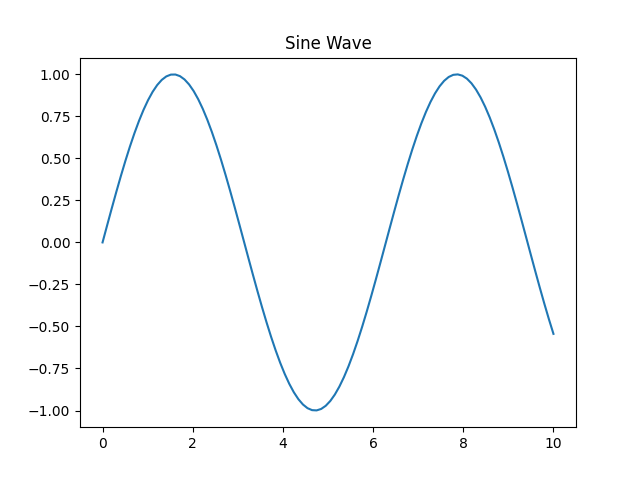

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import io
import base64
from IPDisplay import display

class SafeCodeExecutor:
    def __init__(self):
        self.context = {}

    def execute_code(self, code: str) -> str:
        try:
            exec(code, {"plt": plt, "np": np}, self.context)
            result = self.context.get('result', 'No result variable defined')
            return str(result)
        except Exception as e:
            return f"Error: {str(e)}"

    def generate_plot(self) -> str:
        try:
            # Ensure there's a plot to display
            if not plt.get_fignums():
                return "No plot generated"
            
            # Save the plot to a buffer
            buffer = io.BytesIO()
            plt.savefig(buffer, format='png')
            buffer.seek(0)
            
            # Encode the plot as a base64 string
            plot_base64 = base64.b64encode(buffer.read()).decode('utf-8')
            buffer.close()
            
            # Clear the plot
            plt.close()
            
            return plot_base64
        except Exception as e:
            return f"Error generating plot: {str(e)}"

# Example usage
executor = SafeCodeExecutor()

# Sample user-provided code to generate a plot
code_string = """
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title('Sine Wave')
"""

# Execute the user-provided code
result = executor.execute_code(code_string)
print(result)  # Should output 'No result variable defined'

# Generate and retrieve the plot as a base64 string
plot_base64 = executor.generate_plot()
if plot_base64.startswith("Error"):
    print(plot_base64)
else:
    # Display the plot in an HTML img tag
    html_img_tag = f'<img src="data:image/png;base64,{plot_base64}" />'
    print(html_img_tag)  # You can render this in a web page or display it in a Jupyter notebook
